In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [75]:
df = pd.read_csv("Netflix Engagement (plus).csv")

In [76]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']","persian empire,empire,5th century b.c.,achaeme...",NaN
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']","producer,three word title,headstrong,arranged ...",The film follows headstrong Ginny who meets Su...
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],NaN,NaN
3,Wednesday: Season 1,Yes,2022-11-23,507700000,NaN,NaN,['Talk-Show'],youtube video,MsMojo counts down the top 10 Wednesday (2022)...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,50077.0,7.4,"['Drama', 'History', 'Romance']","prequel,queen,historical,england,queen charlot...","Betrothed against her will to King George, you..."


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18332 entries, 0 to 18331
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                18332 non-null  object 
 1   Available Globally?  18332 non-null  object 
 2   Release Date         4879 non-null   object 
 3   Hours Viewed         18332 non-null  int64  
 4   Number of Ratings    14222 non-null  float64
 5   Rating               14222 non-null  float64
 6   Genre                15761 non-null  object 
 7   Key Words            12801 non-null  object 
 8   Description          10619 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.3+ MB


In [78]:
df.columns

Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed',
       'Number of Ratings', 'Rating', 'Genre', 'Key Words', 'Description'],
      dtype='object')

In [79]:
df.isnull().sum()

Title                      0
Available Globally?        0
Release Date           13453
Hours Viewed               0
Number of Ratings       4110
Rating                  4110
Genre                   2571
Key Words               5531
Description             7713
dtype: int64

In [80]:
round(((df.isnull().sum()) / df.shape[0])*100, 2)
# percentage of missing values

Title                   0.00
Available Globally?     0.00
Release Date           73.39
Hours Viewed            0.00
Number of Ratings      22.42
Rating                 22.42
Genre                  14.02
Key Words              30.17
Description            42.07
dtype: float64

In [81]:
print(df['Title'].duplicated().sum())

118


In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Viewed,18332.0,5.120205e+06,1.867122e+07,100000.0,200000.00,700000.0,3400000.0,812100000.0
Number of Ratings,14222.0,4.613511e+04,1.486087e+05,5.0,343.25,2594.0,19355.0,2829797.0
Rating,14222.0,6.509056e+00,1.227839e+00,1.2,5.80,6.6,7.3,10.0


Release Date seems to correlate to Neflix Original Shows considering other shows are created by Netflix or imported. 

Key Words act like tags to a show that may have been missed when the data was being scraped and may not hold much use considering its varied types of terms that are not often repeated for other shows in tags.

Description is the same case similar to Key Words, mainly holding only a quick intro to a film. The data may prove difficult to use for analysis regardless due to how unique each entry may be thus having a lack of consistency to be used for analysis.

**Movies Available Globally vs Non-Global**

In [83]:
df['Available Globally?'].value_counts()

No     13798
Yes     4534
Name: Available Globally?, dtype: int64

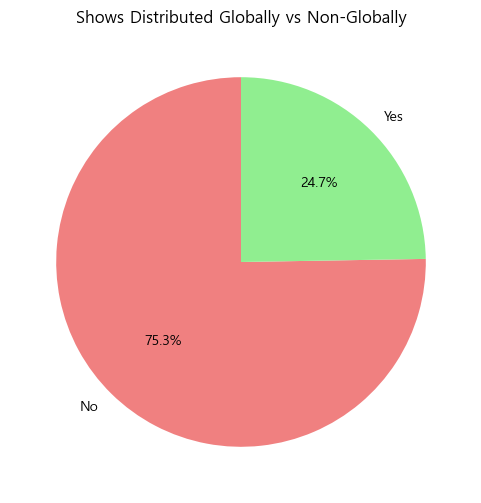

In [84]:
value_count = df['Available Globally?'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(value_count,labels=value_count.index,autopct='%1.1f%%',startangle=90, colors=['lightcoral','lightgreen'])
plt.title('Shows Distributed Globally vs Non-Globally')
plt.show()

Large number of shows are not available globally. But there is a chance that the data may be innacurate considering there were 118 duplicate titles found.

**Understanding what Shows were best rated**

In [85]:
df.loc[df['Number of Ratings'] >= 500].sort_values('Rating',ascending=False).head(10)


,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
16573,Mr. Boss // 미스터 보스,No,NaN,100000,530.0,9.4,"['Short', 'Adventure']",NaN,Mr. swag boss&apos;s world gets turned upside ...
425,Avatar: The Last Airbender: Book 3,No,NaN,40100000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
343,Avatar: The Last Airbender: Book 1,No,NaN,45500000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
444,Avatar: The Last Airbender: Book 2,No,NaN,38700000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
5871,The Shawshank Redemption,No,NaN,2100000,2829797.0,9.3,['Drama'],"prison,based on the works of stephen king,esca...",NaN
7870,AHIRU NO SORA: Season 1 // あひるの空: シーズン1,No,NaN,1000000,14593.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."
7917,Dealer: Season 1 // Caïd: Saison 1,Yes,2021-03-10,1000000,14593.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."
5849,Still Game: Season 1,No,NaN,2100000,14593.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."
6611,Nadiya’s Time to Eat: Season 1,Yes,2020-04-29,1600000,14593.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."
16122,Kissing Game: Season 1 // Boca a Boca: Tempora...,Yes,2020-07-17,100000,14592.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."


Note:

Ratings must be accounted for the total number rather than Ratings by itself.

Some Shows are not globally available and should be accounted for when looking into other trends.

Seems that most words and descriptions were either missing, not available, or was not recorded entirely.

Unavailable Release Dates make no sense unless its mainly looking for the release date of a Netflix Original Series. Most likely scenario is that any "Classed" Netflix Original Series has its release date recorded but imported shows such as Shawshank would not.

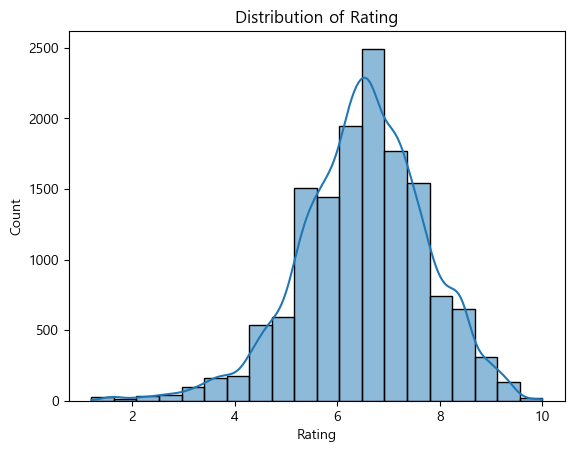

In [86]:
sns.histplot(df['Rating'],bins=20,kde=True)
plt.title('Distribution of Rating')
plt.show()

Text(0.5, 1.0, 'Distribution of Rating (Percentage)')

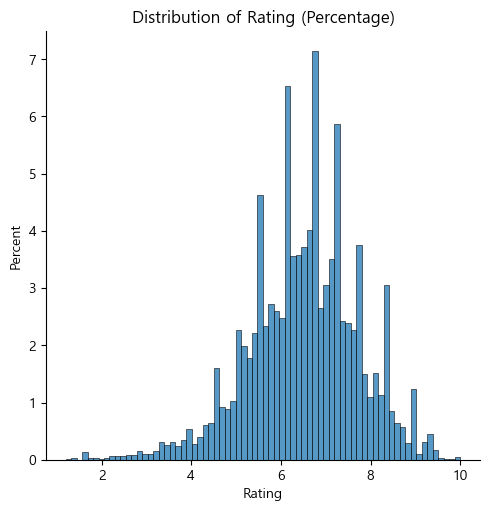

In [87]:
# percentage of ratings
sns.displot(df['Rating'],stat='percent')
plt.title("Distribution of Rating (Percentage)")

The histogram shows that the 'Rating' data is slightly skewed to the left. Meaning majority of the data is on the lower side. As well as meaning that the mean will be lower than the median. However data may be innacurate in its representation considering that 22% of the data is missing.

In [88]:
largest_rating_row = df['Number of Ratings'].idxmax()
max_val = df.loc[largest_rating_row, 'Number of Ratings']

print(f'The largest value in the column "Number of Ratings" was {max_val}, found in row index {largest_rating_row}')

The largest value in the column "Number of Ratings" was 2829797.0, found in row index 5871


In [89]:
df.loc[5871]

Title                                           The Shawshank Redemption
Available Globally?                                                   No
Release Date                                                         NaN
Hours Viewed                                                     2100000
Number of Ratings                                              2829797.0
Rating                                                               9.3
Genre                                                          ['Drama']
Key Words              prison,based on the works of stephen king,esca...
Description                                                          NaN
Name: 5871, dtype: object

In [90]:
df.loc[df['Available Globally?'] == 'Yes'].sort_values('Rating',ascending=False).head()
# checking to see global highly rated show with no limits placed


,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
11793,Haroun,Yes,2021-10-27,300000,7.0,10.0,"['Short', 'History']",commercial microsoft excel course,Join Chris Haroun in this Super Bowl-inspired ...
10524,Tom Papa: You're Doing Great!,Yes,2020-02-04,500000,5.0,10.0,"['Short', 'Comedy']",NaN,"On the impending death of her parents, a hopef..."
629,Love Is Blind: Brazil: Season 3 // Casamento à...,Yes,2023-06-07,30100000,9.0,9.9,"['Short', 'Romance']",NaN,The Blind 3 is following with two parts of the...
2415,One Day at a Time: Season 1,Yes,2017-01-06,8300000,30.0,9.7,"['Documentary', 'Drama']","reenactment,woman,young",One Second at a Time is a documentary about ad...
12945,Demetri Martin: Live (At the Time),Yes,2015-08-14,200000,13.0,9.7,['Music'],NaN,Former Jethro Tull guitarist Martin Barre lead...


In [91]:
df.loc[(df['Available Globally?'] == 'No')].sort_values('Rating', ascending= False).head()
# checking to see non-global highly rated show with no limits placed

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
4161,Big Time Rush: Season 2,No,NaN,3900000,10.0,10.0,"['Short', 'Comedy']",NaN,NaN
4907,Big Time Rush: Season 1,No,NaN,2900000,10.0,10.0,"['Short', 'Comedy']",NaN,NaN
6906,Big Time Rush: Season 4,No,NaN,1400000,10.0,10.0,"['Short', 'Comedy']",NaN,NaN
12339,The Country Cowboy // Il ragazzo di campagna,No,NaN,300000,8.0,9.9,"['Documentary', 'Short']",NaN,This is a documentary about Pete Boddis a 78 y...
14472,Zip & Zap and the Marble Gang // Zipi y Zape y...,No,NaN,200000,27.0,9.9,"['Short', 'Horror']",NaN,"On her 16th birthday, singer-songwriter Melody..."


In [92]:
highest_rating_row = df['Rating'].idxmax()
max_val = df.loc[highest_rating_row, 'Number of Ratings']
show_title = df.loc[highest_rating_row,'Title']

print(f'The largest value in the column "Rating" was {max_val}, found in row index {highest_rating_row} and the Title is {show_title}')

The largest value in the column "Rating" was 10.0, found in row index 4161 and the Title is Big Time Rush: Season 2


In [93]:
df.loc[(df['Number of Ratings'] >= 500)].sort_values('Rating', ascending=False).head()
# Checking to see what shows was highly-rated with limit placed for both global and non-global rating

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
16573,Mr. Boss // 미스터 보스,No,NaN,100000,530.0,9.4,"['Short', 'Adventure']",NaN,Mr. swag boss&apos;s world gets turned upside ...
425,Avatar: The Last Airbender: Book 3,No,NaN,40100000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
343,Avatar: The Last Airbender: Book 1,No,NaN,45500000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
444,Avatar: The Last Airbender: Book 2,No,NaN,38700000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
5871,The Shawshank Redemption,No,NaN,2100000,2829797.0,9.3,['Drama'],"prison,based on the works of stephen king,esca...",NaN


In [94]:
df_filtered = df.loc[(df['Available Globally?'] == 'Yes')].sort_values('Rating',ascending=False)
df_filtered.loc[(df_filtered['Number of Ratings'] >= 500)].sort_values('Rating',ascending=False).head()

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
12920,Dating Around: Brazil: Season 1 // O Crush Per...,Yes,2020-07-10,200000,14592.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."
7263,Rhyme Time Town: Season 1,Yes,2020-06-19,1300000,14593.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."
16122,Kissing Game: Season 1 // Boca a Boca: Tempora...,Yes,2020-07-17,100000,14592.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."
102,All of Us Are Dead: Season 1 // 지금 우리 학교는: 시즌 1,Yes,2022-01-28,94600000,14591.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."
1764,The Letter for the King: Season 1,Yes,2020-03-20,11900000,14592.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."


In [95]:
df_filtered_nonGlobal = df.loc[(df['Available Globally?'] == 'No')].sort_values('Rating',ascending=False)
df_filtered_nonGlobal.loc[(df_filtered_nonGlobal['Number of Ratings'] >= 500)].head()

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
16573,Mr. Boss // 미스터 보스,No,NaN,100000,530.0,9.4,"['Short', 'Adventure']",NaN,Mr. swag boss&apos;s world gets turned upside ...
343,Avatar: The Last Airbender: Book 1,No,NaN,45500000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
444,Avatar: The Last Airbender: Book 2,No,NaN,38700000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
425,Avatar: The Last Airbender: Book 3,No,NaN,40100000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
5871,The Shawshank Redemption,No,NaN,2100000,2829797.0,9.3,['Drama'],"prison,based on the works of stephen king,esca...",NaN


Findings:

If no changes are made, "Haroun" is the most highly rated global show on Netflix with a 10.0 rating and is a Netflix Original.

Among Non-global shows, "Big Time Rush" is the most well rated. 

If limits are made such as needing to have more than 500 reviews on a show, then "Mr.Boss" is the most well rated in Non-global shows and "Dating Around: Brazil: Season 1" is the most well rated world wide.

Choosing 500 as the minimum requirement for total number of reviews was based on personal preference on the idea of 500 reviews being enough to express a show's popularity and allow for variability in the show's final rating.

**Most Viewed Shows in global and Non-Global**

In [96]:
top_shows = df.sort_values('Hours Viewed',ascending=False).head()

['STIXSizeTwoSym', 'cmb10', 'STIXSizeOneSym', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'STIXSizeFourSym', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'DejaVu Sans', 'cmss10', 'DejaVu Serif', 'STIXGeneral', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'STIXGeneral', 'STIXGeneral', 'DejaVu Sans Display', 'DejaVu Sans', 'STIXNonUnicode', 'STIXGeneral', 'cmsy10', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans', 'STIXNonUnicode', 'DejaVu Serif', 'DejaVu Serif', 'STIXSizeTwoSym', 'DejaVu Serif Display', 'DejaVu Sans Mono', 'cmex10', 'cmr10', 'cmmi10', 'STIXNonUnicode', 'DejaVu Serif', 'cmtt10', 'STIXNonUnicode', 'DejaVu Sans', 'Leelawadee', 'Courier New', 'Franklin Gothic Heavy', 'Agency FB', 'Segoe Print', 'MingLiU-ExtB', 'Niagara Engraved', 'Candara', 'Calisto MT', 'Microsoft Tai Le', 'Copperplate Gothic Light', 'Rockwell', 'Elephant', 'Microsoft New Tai Lue', 'Century Schoolbook', 'Times New Roman', 'Segoe UI', 'Franklin Gothic Demi', 'Malgun Gothic', 'Chiller', 'Bodoni MT', 'Cambria', 'Bell MT',

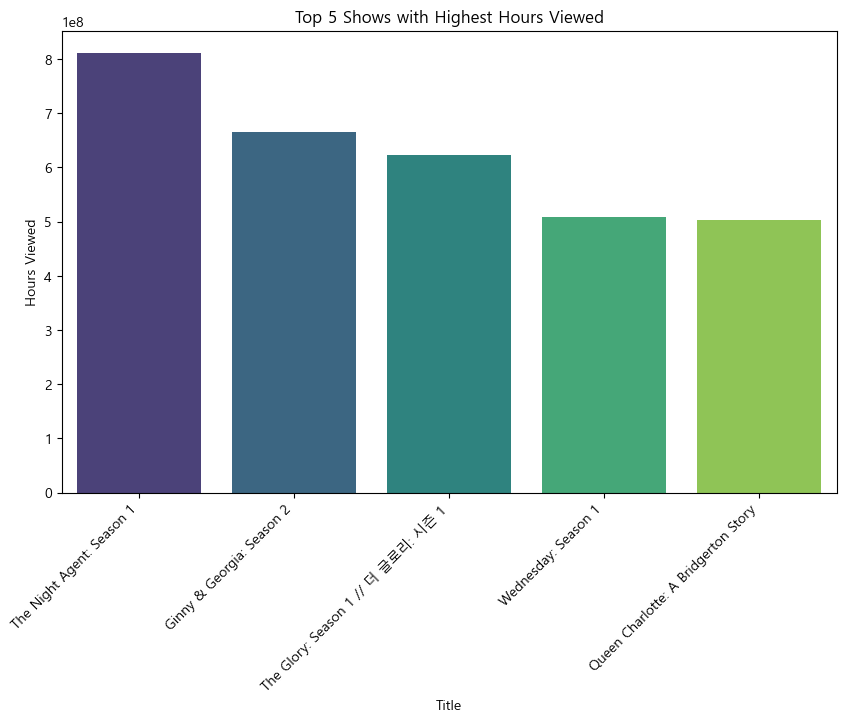

In [117]:
# 가능한 font list 확인
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f)

# 확인 이후
plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(10,6))
sns.barplot(x="Title", y='Hours Viewed', data=top_shows, palette="viridis")
plt.xlabel("Title")
plt.ylabel("Hours Viewed")
plt.title("Top 5 Shows with Highest Hours Viewed")
plt.xticks(rotation=45,ha='right')
plt.show()

In [106]:
lowest_shows = df.sort_values('Hours Viewed',ascending=True).head()

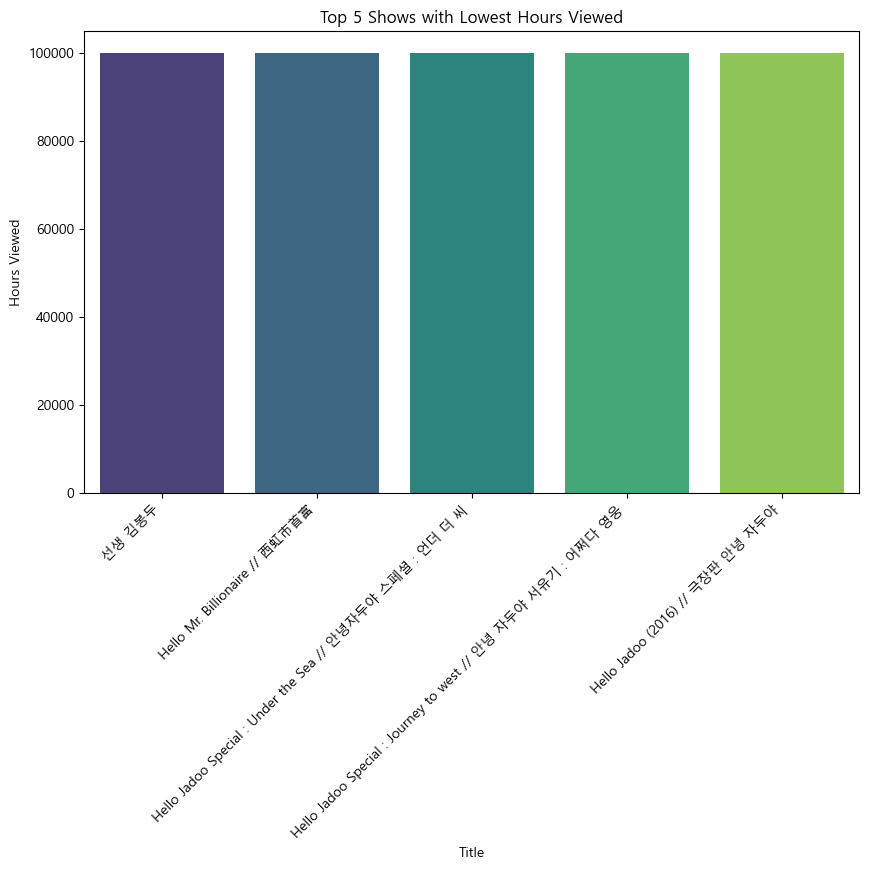

In [116]:
plt.figure(figsize=(10,6))
sns.barplot(x="Title", y='Hours Viewed', data=lowest_shows, palette="viridis")
plt.xlabel("Title")
plt.ylabel("Hours Viewed")
plt.title("Top 5 Shows with Lowest Hours Viewed")
plt.xticks(rotation=45, ha='right')
plt.show()

I was surprised to see that the shows would essentially have a minimum of 100,000 views or maybe that is a requirement of Netflix. But no matter what even the lowest viewed shows would not go below 100,000. 

In [110]:
non_global_top_shows = df.loc[df['Available Globally?'] == 'No'].sort_values('Hours Viewed',ascending=False).head()
global_top_shows = df.loc[df['Available Globally?'] == 'Yes'].sort_values('Hours Viewed',ascending=False).head()

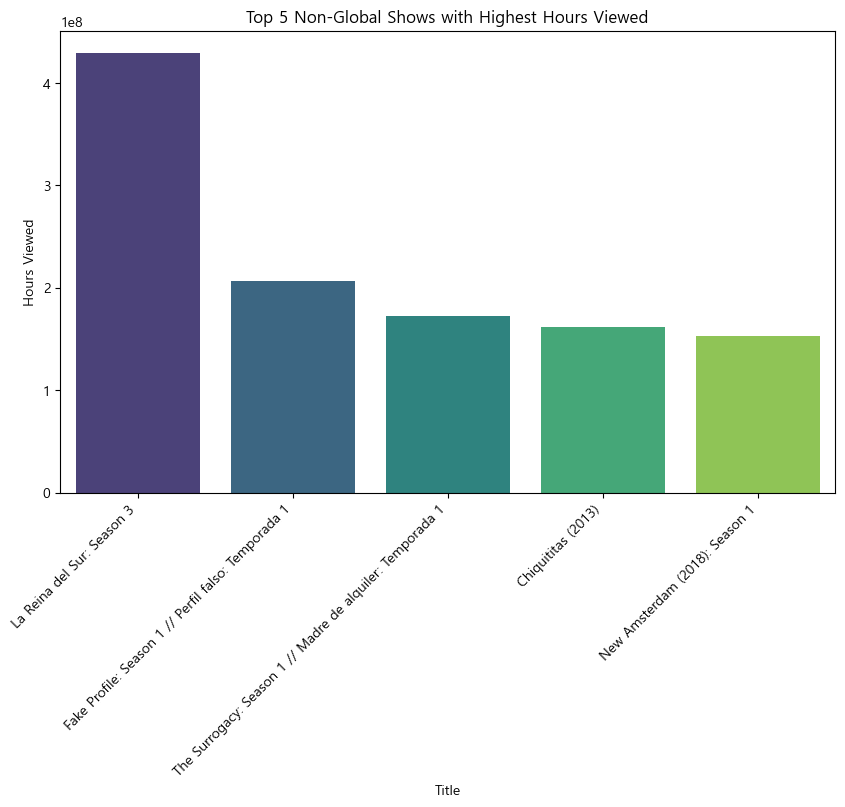

In [115]:
plt.figure(figsize=(10,6))
sns.barplot(x="Title", y='Hours Viewed', data=non_global_top_shows, palette="viridis")
plt.xlabel("Title")
plt.ylabel("Hours Viewed")
plt.title("Top 5 Non-Global Shows with Highest Hours Viewed")
plt.xticks(rotation=45,ha='right')
plt.show()

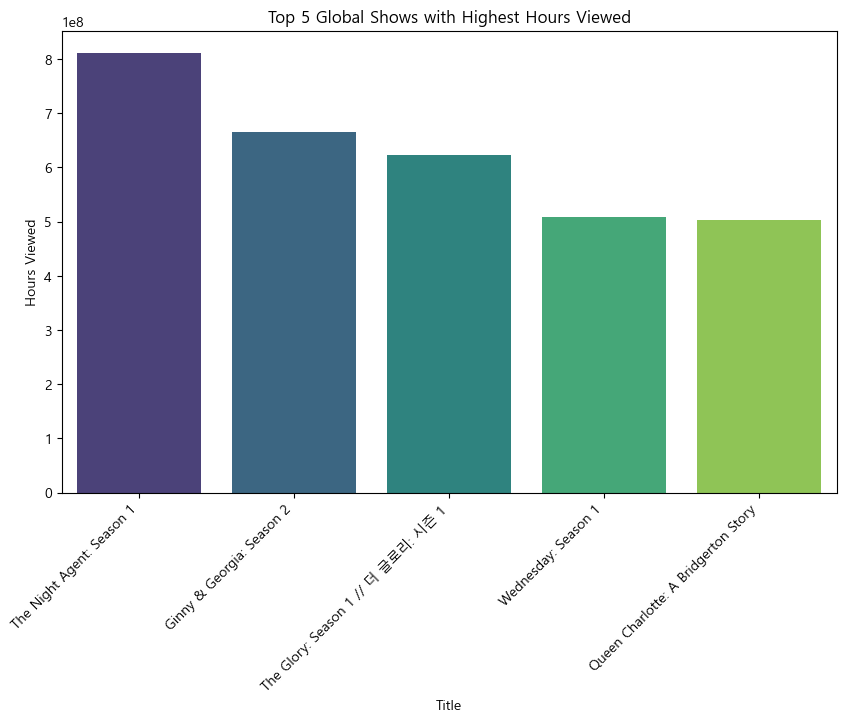

In [118]:
plt.figure(figsize=(10,6))
sns.barplot(x="Title", y='Hours Viewed', data=global_top_shows, palette="viridis")
plt.xlabel("Title")
plt.ylabel("Hours Viewed")
plt.title("Top 5 Global Shows with Highest Hours Viewed")
plt.xticks(rotation=45,ha='right')
plt.show()

<Figure size 1000x600 with 0 Axes>

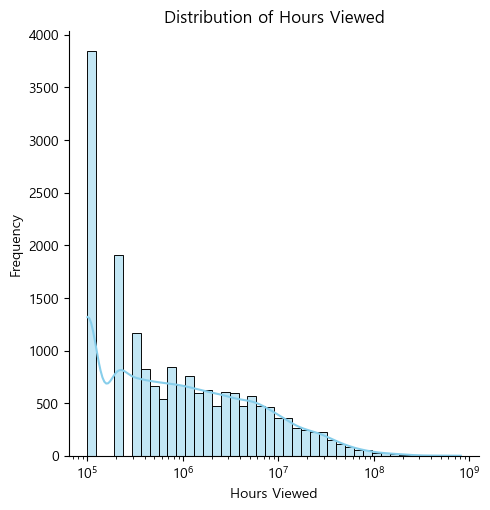

In [122]:
plt.figure(figsize=(10, 6))
sns.displot(df['Hours Viewed'], kde=True,log_scale=True, color='skyblue')
plt.xlabel('Hours Viewed')
plt.ylabel('Frequency')
plt.title('Distribution of Hours Viewed')
plt.show()

There can be seen a large frequency of hours for a small amount of shows before dropping slowly to the wider margin of shows that would have significantly less number of hours viewed.

**Most Popular and Well-Rated Genres**

In [98]:
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Total Count']

grouped_data = pd.merge(df.groupby('Genre').agg({
    'Rating': 'mean',
    'Number of Ratings': 'sum',
    'Hours Viewed': 'sum',
}).reset_index(), genre_counts, on='Genre')  # Resetting index to have 'Genre' as a column, not an index

In [99]:
top_5_viewed_genre = grouped_data.sort_values(by='Hours Viewed', ascending=False).head()
grouped_data.sort_values(by='Hours Viewed', ascending=False).head()

,Genre,Rating,Number of Ratings,Hours Viewed,Total Count
669,['Short'],8.444186,2644212.0,6951600000,639
429,"['Documentary', 'Short']",8.048276,432128.0,3560900000,357
147,"['Animation', 'Action', 'Adventure']",7.048317,12832270.0,2980600000,433
260,"['Comedy', 'Drama', 'Romance']",6.405459,20249742.0,2616900000,404
160,"['Animation', 'Adventure', 'Comedy']",6.368546,18150841.0,2454500000,341


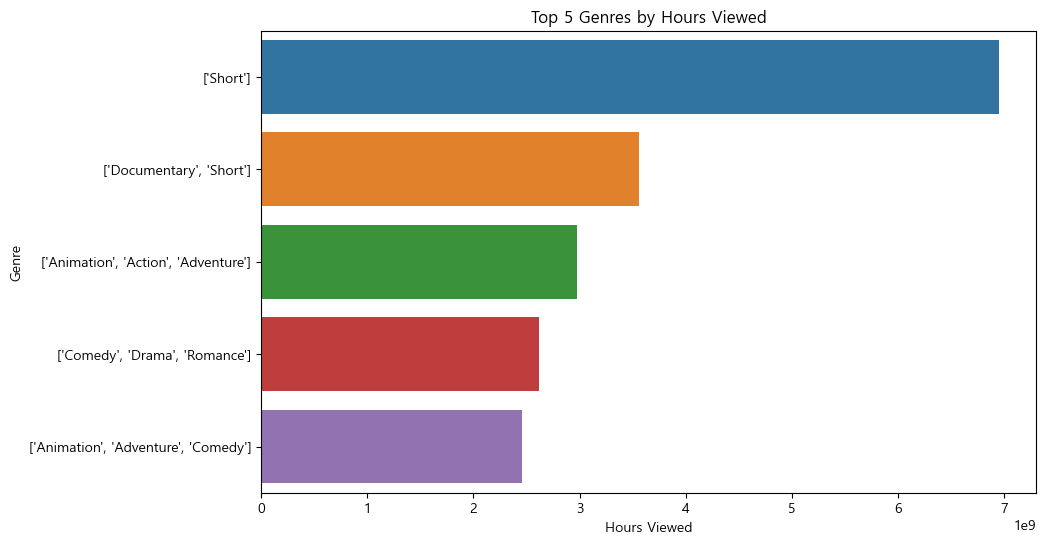

In [119]:
plt.figure(figsize=(10,6))
sns.barplot(x='Hours Viewed', y='Genre', data=top_5_viewed_genre)
plt.xlabel('Hours Viewed')
plt.ylabel('Genre')
plt.title('Top 5 Genres by Hours Viewed')
plt.show()

Considering how specific each Genre was in the dataset, There are combined genres for some rows that proved to be difficult to separate. Judging from the data presently shown, Short were the most watched genre totaling at 6951600000.

In [101]:
grouped_data.sort_values(by="Rating", ascending=False).head()

,Genre,Rating,Number of Ratings,Hours Viewed,Total Count
425,"['Documentary', 'Short', 'Music']",9.4,7.0,500000,1
510,"['Family', 'History', 'Sport']",8.8,216.0,346100000,8
97,"['Adventure', 'Comedy', 'Game-Show']",8.8,13.0,100000,1
177,"['Animation', 'Comedy', 'Sci-Fi']",8.7,49.0,164000000,8
659,"['Short', 'News']",8.6,20.0,65800000,7


If going based off of highest rated genre, they can prove to be untrustworthy considering the varied number of Ratings. It can be well seen how skewed ratings can be based on the total number of titles attched to a genre, total hours, and the number of ratings.

**Netflix Original Shows vs Regular Shows**

In [102]:
df

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']","persian empire,empire,5th century b.c.,achaeme...",NaN
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']","producer,three word title,headstrong,arranged ...",The film follows headstrong Ginny who meets Su...
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],NaN,NaN
3,Wednesday: Season 1,Yes,2022-11-23,507700000,NaN,NaN,['Talk-Show'],youtube video,MsMojo counts down the top 10 Wednesday (2022)...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,50077.0,7.4,"['Drama', 'History', 'Romance']","prequel,queen,historical,england,queen charlot...","Betrothed against her will to King George, you..."
...,...,...,...,...,...,...,...,...,...
18327,راس السنة,No,NaN,100000,383.0,4.8,['Drama'],live,A tale of different people whose lives intertw...
18328,心が叫びたがってるんだ。,No,NaN,100000,6209.0,7.3,"['Animation', 'Drama', 'Family']","anime animation,anime",A young girl had her voice magically taken awa...
18329,두근두근 내 인생,No,NaN,100000,NaN,NaN,NaN,NaN,NaN
18330,라디오 스타,No,NaN,100000,NaN,NaN,NaN,NaN,NaN


In [103]:
release_date_count = df['Release Date'].notna().value_counts()

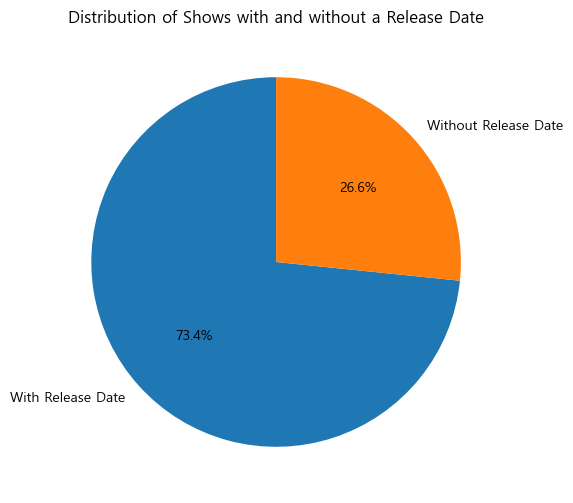

In [104]:
labels = ['With Release Date', 'Without Release Date']
sizes = release_date_count.values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels,autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Shows with and without a Release Date")
plt.show()

To my Understanding when looking through the shows in the data, most shows that had a release date were also seen to be a Netflix Original Show. Even picking a random row that had either a release date or not helped support the idea. Based on an article by "The Economic Times" in July 13, 2023, it was found out that "Currently, of all content streaming on Neflix US, more than half consists of Neflix Originals. The figure is 55%, a year-on-year increase of 5%." Of course the data we are using is involving global and non-global shows, that would change the data significantly but it still supports that idea given the chart above.

**Summary**

We have analyzed data revolving Netflix Engagement to gain an understanding of what shows have turned out to be the most popular in Netflix, what has changed in Netflix's content, and audience preferences. The analysis made ahas shwon a wide range of interesting discoveries regarding people's tastes and how performance is seen on shows such as the hours viewed and overall rating of a shows as well as the possiblity of bias in rating due to the number of ratings given to a specific show. Meaning that a general 10.0 rating may not be as trustworthy without knowing the total number of reviews and views the show has had. As well as providiing insight to the quantity of shows Netflix has been creating for their streaming site. Overall, this analysis allows us to understand viewer hehavior and landscape of Netflix.